In [26]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

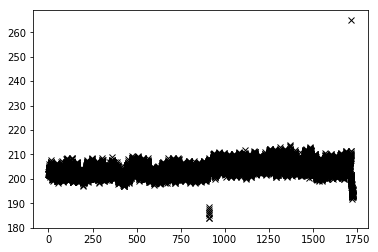

9120
9121
9122
9123
9124
9125
9126
9127


In [27]:
mat_file1 = io.loadmat('2014_Dataset1.mat')
t = mat_file1['t']
p1 = mat_file1['p1']
p2 = mat_file1['p2']
x = np.arange(0,len(p2)/10,0.1)[:,None]
plt.plot(x,p2,'kx')
plt.show()
for i in range(len(x)-1):
    if p2[i]<190:
        print (i)

# Training

In [3]:
K1 = GPy.kern.RBF(1)
K2 = GPy.kern.Exponential(1)
K3 = GPy.kern.Matern32(1)
K4 = GPy.kern.Matern52(1)
K5 = GPy.kern.PeriodicExponential(1)
K6 = GPy.kern.PeriodicMatern32(1)
K7 = GPy.kern.PeriodicMatern52(1)

In [4]:
i = range(0, 10000)

In [5]:
def f(X):
    mean = np.ones(len(X))[:,None] * np.average(p2[i])
    return mean

mean = GPy.core.Mapping(input_dim=1, output_dim=1)
mean.f = f
mean.update_gradients = lambda a,b: None

In [6]:
model1 = GPy.models.GPRegression(x[i], p2[i], kernel = K1+K4, mean_function= mean)
model1.optimize()

# Phase 2

In [21]:
from scipy import stats
stats.norm.cdf(2.33)

0.9900969244408357

In [28]:
s = 8950
l = 120
kern = model1.kern.copy()

it = list(range(s,s+l))
anomal_points = []
test_points = []
test_points2 = []
z_score = []
con_bd = []
step = 1

for i in range(150):
    new = it[len(it)-1]+step
    test_points.append(new)
    print(new)
    
    model = GPy.models.GPRegression(x[it], p2[it], kernel = kern, mean_function=mean)
    model['.*Gaussian_noise.variance'].constrain_fixed(model1.Gaussian_noise[0])
    
    test_x = x[new]

    jt = it + list([new])
    mu, var = model.predict(x[jt], kern=model.kern, likelihood=model.likelihood)
    
    con_ue = mu + np.sqrt(var)*2.33
    con_le = mu - np.sqrt(var)*2.33

    if i == 0:
        for j in range(len(con_ue)):
            con_bd.append([con_ue[j],con_le[j]])
            test_points2.append([jt[j],jt[j]])
    else:
        con_bd.append([con_ue[-1], con_le[-1]])
        test_points2.append([new,new])
    
    z = (p2[new]-mu[l])/np.sqrt(var[l])
    z_score.append(z)
    
    if p2[new] > mu[l] + 2.33*np.sqrt(var[l]) or p2[new] < mu[l] - 2.33*np.sqrt(var[l]):
        anomal_points.append(new)
        it = it
        step += 1
    else:
        it.pop(0)
        it = it + list([new])
        step = 1
        

9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219


In [29]:
anomal_points

[9080, 9111, 9120, 9121, 9122, 9123, 9124, 9125, 9126, 9127]

In [30]:
f = (np.array(test_points2)[:,0]/10)[:,None][:,0]
c1 = (np.array(con_bd)[:,0])[:,0]
c2 = (np.array(con_bd)[:,1])[:,0]

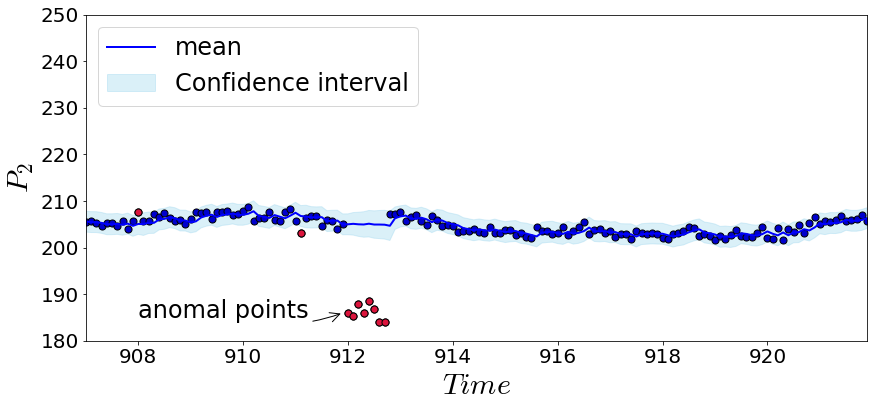

In [31]:
fig2 = pb.figure(figsize=(14,6))
plt.xlim([907.0,921.9])
plt.ylim([180,250])
# plt.title('GP',fontsize = 20)
plt.tick_params(labelsize=20)
plt.xlabel(r'$Time$',fontsize=30)
plt.ylabel(r'$P_{2}$',fontsize = 30)
plt.scatter(x[test_points],p2[test_points],s = 50,color='mediumblue', zorder=2,edgecolors='black')
plt.scatter(x[anomal_points],p2[anomal_points],s = 50,color='crimson', zorder=2,edgecolors='black')
# plt.plot(np.array(test_points2)[:,0]/10,np.array(con_bd)[:,0],color='red',label="Extreme boundary",lw=1.5)
# plt.plot(np.array(test_points2)[:,1]/10,np.array(con_bd)[:,1],color='red',lw=1.5)
plt.fill_between(f, c1, c2, color='skyblue', alpha=0.3,label="Confidence interval")
plt.plot(np.array(test_points2)[:,1]/10,(c1+c2)/2,color='blue',label="mean",lw=2)
# ax1.legend(fontsize=22, loc='center left', bbox_to_anchor=(0.75, 0.75))
plt.legend(fontsize=24, loc=2)
plt.annotate('anomal points', xy=(911.9, 186), xytext=(908.0, 185), fontsize = 24, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
fig2.savefig('single_1.png',bbox_inches='tight')

# fig3 = pb.figure(figsize=(16,9))
# plt.xlim([907.0,921.9])
# plt.ylim([-0.1,1.2])
# plt.tick_params(labelsize=20)
# plt.xlabel(r'$Time$',fontsize=28)
# plt.ylabel(r'$p-value$',fontsize = 28)
# plt.plot(x[test_points],chi_sq,lw=1.6)
# a = np.linspace(902.0,921.9,100)
# th = 0.02*np.ones(a.shape)
# plt.plot(a,th,color='red',label="Threshold=0.02",lw=1.6)
# # ax2.legend(fontsize=22, loc='center left', bbox_to_anchor=(0.75, 0.85))
# plt.legend(fontsize=28, loc=2)
# plt.annotate('Trend anomaly', xy=(911.1, 0.03), xytext=(912, 0.1), fontsize = 24, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
# fig3.savefig('9_c.png',bbox_inches='tight')

# plt.show()

# Anomaly points per each month

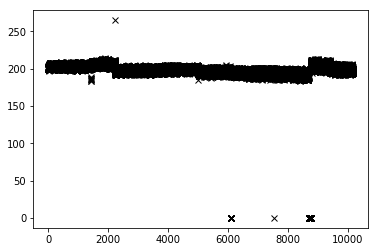

In [32]:
import pandas as pd

mat_file1 = pd.read_csv('dataset 5211.csv')
p1 = np.array(mat_file1['P1'])[:,None]
p2 = np.array(mat_file1['P2'])[:,None]
x = np.arange(0,len(p2)/10,0.1)[:,None]
for i in range(len(p2)):
    if p2[i]<5:
        p2[i] = p2[i]*100
plt.plot(x[0:101682],p2[0:101682],'kx')
plt.show()

In [33]:
Month = []
for i in range(len(mat_file1)):
    if mat_file1['Day'][i] == 1 and mat_file1['Hour'][i] == 0 and mat_file1['Minute'][i]==0:
        Month.append(i)
Mon = list(Month)[0:10]+[86897]+[92773]+[Month[11]]
mat_file1.loc[Mon,:]

,HISTID,Year,Month,Day,Hour,Minute,P1,P2
0,5211,2014,1,1,0,0,5.941,200.854
8928,5211,2014,2,1,0,0,5.972,201.404
16992,5211,2014,3,1,0,0,5.999,204.333
25914,5211,2014,4,1,0,0,6.067,197.742
34551,5211,2014,5,1,0,0,6.121,198.291
43472,5211,2014,6,1,0,0,6.155,201.404
52108,5211,2014,7,1,0,0,6.088,197.376
61036,5211,2014,8,1,0,0,6.067,195.362
69964,5211,2014,9,1,0,0,6.155,195.911
78343,5211,2014,10,1,0,0,6.042,193.348


In [34]:
s = 0
l = 120
kern = model1.kern.copy()

it = list(range(s,s+l))
anomal_points_year = []
step = 1

for i in range(Mon[12]-l-1):
    new = it[len(it)-1]+step
    test_points.append(new)
    print(new)
    
    model = GPy.models.GPRegression(x[it], p2[it], kernel = kern, mean_function=mean)
    model['.*Gaussian_noise.variance'].constrain_fixed(model1.Gaussian_noise[0])
    
    test_x = x[new]

    jt = it + list([new])
    mu, var = model.predict(x[jt], kern=model.kern, likelihood=model.likelihood)
    
    if p2[new] > mu[l] + 2.33*np.sqrt(var[l]) or p2[new] < mu[l] - 2.33*np.sqrt(var[l]):
        anomal_points_year.append(new)
        it = it
        step += 1
    else:
        it.pop(0)
        it = it + list([new])
        step = 1
    
    if len(it) > l:
        it = it[-l:]

120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369


KeyboardInterrupt: 

In [24]:
number_m = np.zeros(12)
for i in range(len(anomal_points_year)):
    for j in range(len(Mon)-1):
        if Mon[j] <= anomal_points_year[i] <= Mon[j+1]:
            number_m[j] += 1
        else:
            pass    

In [25]:
number_m

array([ 102.,  124.,  304.,  186.,  204.,  293., 1260., 1200., 1417.,
       1637., 1436., 1798.])

In [29]:
number_m

array([ 348.,  375.,  683.,  586.,  566.,  701., 1891., 1965., 2189.,
       2482., 1970., 2836.])

In [35]:
s = 22100
l = 150

kern = model1.kern.copy()

it = list(range(s,s+l))
anomal_points = []
test_points = []
test_points2 = []
z_score = []
con_bd = []
step = 1

for i in range(200):
    new = it[len(it)-1]+step
    test_points.append(new)
    print(new)
    
    model = GPy.models.GPRegression(x[it], p2[it], kernel = kern, mean_function=mean)
    model['.*Gaussian_noise.variance'].constrain_fixed(model1.Gaussian_noise[0])
    
    test_x = x[new]

    jt = it + list([new])
    mu, var = model.predict(x[jt], kern=model.kern, likelihood=model.likelihood)
    
    con_ue = mu + np.sqrt(var)*2.33
    con_le = mu - np.sqrt(var)*2.33

    if i == 0:
        for j in range(len(con_ue)):
            con_bd.append([con_ue[j],con_le[j]])
            test_points2.append([jt[j],jt[j]])
    else:
        con_bd.append([con_ue[-1], con_le[-1]])
        test_points2.append([new,new])
    
    z = (p2[new]-mu[l])/np.sqrt(var[l])
    z_score.append(z)
    
    if p2[new] > mu[l] + 2.33*np.sqrt(var[l]) or p2[new] < mu[l] - 2.33*np.sqrt(var[l]):
        anomal_points.append(new)
        it = it
        step += 1
    else:
        it.pop(0)
        it = it + list([new])
        step = 1

22250
22251
22252
22253
22254
22255
22256
22257
22258
22259
22260
22261
22262
22263
22264
22265
22266
22267
22268
22269
22270
22271
22272
22273
22274
22275
22276
22277
22278
22279
22280
22281
22282
22283
22284
22285
22286
22287
22288
22289
22290
22291
22292
22293
22294
22295
22296
22297
22298
22299
22300
22301
22302
22303
22304
22305
22306
22307
22308
22309
22310
22311
22312
22313
22314
22315
22316
22317
22318
22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
22333
22334
22335
22336
22337
22338
22339
22340
22341
22342
22343
22344
22345
22346
22347
22348
22349
22350
22351
22352
22353
22354
22355
22356
22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
2241

In [36]:
f = (np.array(test_points2)[:,0]/10)[:,None][:,0]
c1 = (np.array(con_bd)[:,0])[:,0]
c2 = (np.array(con_bd)[:,1])[:,0]

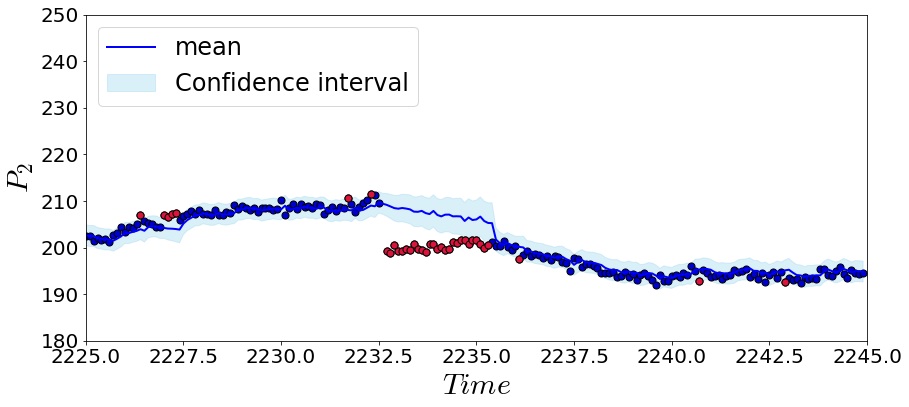

In [37]:
fig1 = pb.figure(figsize=(14,6))
plt.tick_params(labelsize=20)
# plt.title('GP',fontsize = 20)
plt.xlim([(s+l)/10,(s+l)/10+20])
plt.ylim([180,250])
plt.xlabel(r'$Time$',fontsize=30)
plt.ylabel(r'$P_{2}$',fontsize = 30)
plt.scatter(x[test_points],p2[test_points],s = 50,color='mediumblue', zorder=2,edgecolors='black')
plt.scatter(x[anomal_points],p2[anomal_points],s = 50,color='crimson', zorder=2,edgecolors='black')
plt.fill_between(f, c1, c2, color='skyblue', alpha=0.3,label="Confidence interval")
plt.plot(np.array(test_points2)[:,1]/10,(c1+c2)/2,color='blue',label="mean",lw=2)
plt.legend(fontsize=24, loc=2)
fig1.savefig('single_3.png',bbox_inches='tight')